## Sanket Patel 8900086 Lab 2


### Part A

Loading dataset 

In [19]:
# load lab 2 dataset 
import pandas as pd
import numpy as np

data = pd.read_csv('..\..\practical_labs\Lab2_dataset.csv')


In [20]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


check for if there are any na values or any null values

In [21]:
data['text'].isna().values.any()
data['text'].isnull().values.any()

False

From the data head we need to check text and label num attribute as it will help us to identify spam or not


load data into test and train split

In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label_num'], train_size=0.7, random_state=42)

now train Gaussian and multinomial classifiers

and we transformed words into numbers using countvectorizer

In [23]:
#train gaussian and multinomial classifiers model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

#create a count vectorizer object to count the words in the text
coverter = CountVectorizer()
X_train_counts = coverter.fit_transform(X_train)
X_test_counts = coverter.transform(X_test)




In [24]:
# train a Gaussian classifier
GaussianModel = GaussianNB()
GaussianModel.fit(X_train_counts.toarray(), y_train)


GaussianNB()

In [25]:
MultinomialModel = MultinomialNB()
MultinomialModel.fit(X_train_counts, y_train)

MultinomialNB()

predict from the models


In [26]:
GaussianModelPredict= GaussianModel.predict(X_test_counts.toarray())
MultinomialModelPredict= MultinomialModel.predict(X_test_counts)


check performance of each model 

In [27]:
GaussianModelAccuracy = accuracy_score(y_test, GaussianModelPredict)
MultinomialModelAccuracy = accuracy_score(y_test, MultinomialModelPredict)


print("Gaussian Model Accuracy: ", GaussianModelAccuracy)
print("Multinomial Model Accuracy: ", MultinomialModelAccuracy)

Gaussian Model Accuracy:  0.961340206185567
Multinomial Model Accuracy:  0.9742268041237113


so from the models accuracy we can say that multinomial model is better as it has 0.971 accuracy

lets take some test Data to perform predictions on model with high accuray 


In [28]:

exampleData = MultinomialModel.predict(X_test_counts[:5].toarray())
exampleData_text= X_test[:5].tolist()


for text, predicted in zip(exampleData_text, exampleData):
   label = 'spam' if predicted else 'not spam'
   print(f"Text:{text}\n  - Predicted: {label}\n")

Text:Subject: hpl nom for march 30 , 2001
( see attached file : hplno 330 . xls )
- hplno 330 . xls
  - Predicted: not spam

Text:Subject: online pharxmacy 80 % off all meds
disscount phafrmacy onlsine !
( grasnd opegning ,
80 % off all meds , orfder today at your doorstep tomorrow ! )
weisght lorss
meridia
mesns heablth
viagra
visagra st
suzper visagra ( ciaslis )
pazin relsief
ulztram
valisum
xadnax
prolzac
musscle relawxers
soma
stsop smtoking
zyban
asnti depreeessant
prozac
xansax
varlium
pasxil
bypsass all the long lines ,
place your ordder discgreetly now cldick hesre
eagle relaxation leaden
madras meson mitosis quadrant congratulatory salaam transferred flatulent
statesmen credential biota horoscope banister tampon edit superb biochemic
legacy polemic cavern , euridyce yea broomcorn kinesic acquisitive invidious
bridegroom stipulate earthquake twit brendan edmund togs heretofore pop
abhorred - emotional debacle mesmeric amorous swamp quirt confront huntley
cochrane calculable go

### Part B

Load Airbnb dataset and check head of the data

In [30]:
#load Airbnb dataset from the practical labs folder
airbnbData = pd.read_csv('..\..\practical_labs\AB_NYC_2019.csv')
airbnbData.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Visualization of the data

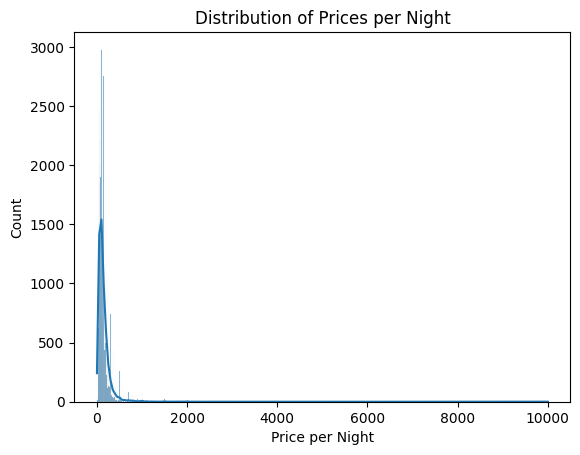

In [42]:

sns.histplot(airbnbData['price'], kde=True)
plt.xlabel('Price per Night')
plt.ylabel('Count')
plt.title('Distribution of Prices per Night')
plt.show()

We will remove outliers using IQR method were data which is lower than 25% quantile and higher than 75% will be removed

In [44]:
#calcaute lower and upper percentile
q1= airbnbData['price'].quantile(0.25)
q3= airbnbData['price'].quantile(0.75)

#calculate the interquartile range
iqr = q3-q1

#calculate the lower and upper bounds
lower_limit= q1 - 1.5*iqr
upper_limit= q3 + 1.5*iqr

#remove outliers
cleanData = airbnbData[(airbnbData['price'] > lower_limit) & (airbnbData['price'] < upper_limit)]


Visualize the data after removinng outliers

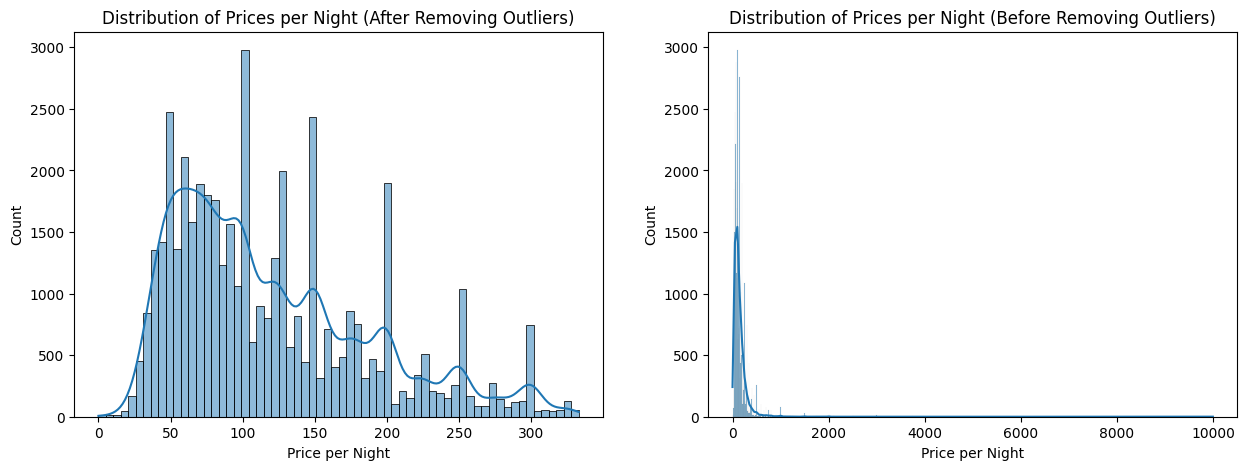

In [51]:
#plot the distribution of prices after removing outliers and compare it with the original distribution in sub plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(cleanData['price'], kde=True, ax=ax1)
ax1.set_xlabel('Price per Night')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Prices per Night (After Removing Outliers)')
sns.histplot(airbnbData['price'], kde=True, ax=ax2)
ax2.set_xlabel('Price per Night')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Prices per Night (Before Removing Outliers)')
plt.show()


